# Build a predictive maintenance model for a delivery company - Classification

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.shape

(124494, 12)

In [5]:
veri_sayilari = df.count() #her kolonda kaç veri var
print(veri_sayilari)

date          124494
device        124494
failure       124494
attribute1    124494
attribute2    124494
attribute3    124494
attribute4    124494
attribute5    124494
attribute6    124494
attribute7    124494
attribute8    124494
attribute9    124494
dtype: int64


In [6]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
for column in df.columns:
    if column != 'attribute1': 
        value_counts = df[column].value_counts()
        num_categories = len(value_counts)
        
        # İki alt kategorisi varsa 0 ve 1 olarak kodlayalım
        if num_categories == 2:
            category_mapping = {category: index for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)
        # İki alt kategoriden fazlaysa 1'den başlayan sıralı sayılarla kodlayalım
        else:
            category_mapping = {category: index + 1 for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   date        124494 non-null  int64
 1   device      124494 non-null  int64
 2   failure     124494 non-null  int64
 3   attribute1  124494 non-null  int64
 4   attribute2  124494 non-null  int64
 5   attribute3  124494 non-null  int64
 6   attribute4  124494 non-null  int64
 7   attribute5  124494 non-null  int64
 8   attribute6  124494 non-null  int64
 9   attribute7  124494 non-null  int64
 10  attribute8  124494 non-null  int64
 11  attribute9  124494 non-null  int64
dtypes: int64(12)
memory usage: 11.4 MB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.drop("failure", axis=1)
y=df["failure"]

In [12]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((99595, 11), (24899, 11), (99595,), (24899,))

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [15]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [16]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [18]:
accuracy_score(tahmin1,y)

0.9991485533439363

In [24]:
accuracy_score(tahmin2,y)

0.9991485533439363

In [19]:
confusion_matrix(tahmin1,y)

array([[124388,    106],
       [     0,      0]])

In [23]:
confusion_matrix(tahmin2,y)

array([[124388,    106],
       [     0,      0]])

In [20]:
from sklearn.metrics import precision_score, recall_score

In [25]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124494
           1       0.00      0.00      0.00         0

    accuracy                           1.00    124494
   macro avg       0.50      0.50      0.50    124494
weighted avg       1.00      1.00      1.00    124494



/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(classification_report(tahmin2,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124494
           1       0.00      0.00      0.00         0

    accuracy                           1.00    124494
   macro avg       0.50      0.50      0.50    124494
weighted avg       1.00      1.00      1.00    124494



/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [28]:
k.fit(x,y)

KNeighborsClassifier()

In [29]:
tahmin3=k.predict(x)

In [30]:
accuracy_score(tahmin3,y)

0.9991485533439363

In [31]:
confusion_matrix(tahmin3,y)

array([[124388,    106],
       [     0,      0]])

In [32]:
print(classification_report(tahmin3,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124494
           1       0.00      0.00      0.00         0

    accuracy                           1.00    124494
   macro avg       0.50      0.50      0.50    124494
weighted avg       1.00      1.00      1.00    124494



/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy yüksek ama recall ve precision çok düşük. Bu durum beni araştırmaya itti ve verimin unbalanced data olduğuna karar verdim. Unbalanced datasetlerde en büyük gösterge yüksek accuracy düşük precision yada recall değeridir.

In [33]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# create a binary classification dataset
X, y = make_classification(
    n_samples=124494,
    n_features=12,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.98],
    random_state=125,
)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 121383, 1: 3111})


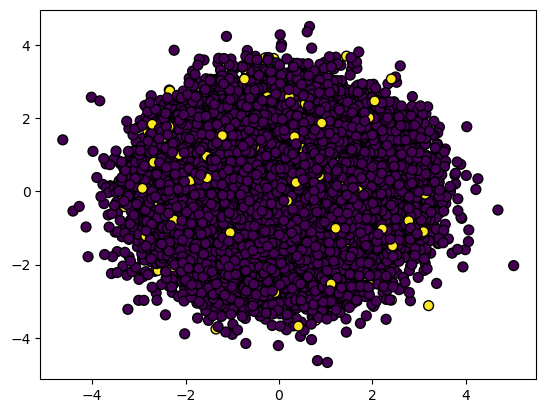

In [36]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");


In [37]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.838


In [38]:
over = SMOTE()

X, y = over.fit_resample(X, y)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 121383, 1: 121383})


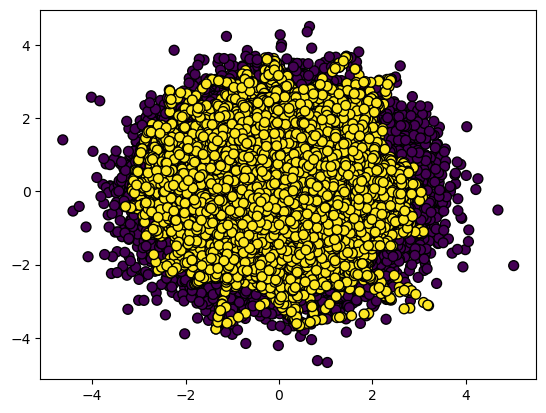

In [39]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");


In [40]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.946
